In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\fabri\Desktop\my_repo\env\synthetic_orders_clean.csv")
df.head()


,order_id,order_datetime,day_of_week,is_weekend,is_holiday,holiday_name,num_pizzas,total_amount,distance_km,temperature_C
0,132708,2024-01-01 11:00:06,0,0,1,Capodanno,2,19.25,5.50,18.3
1,487813,2024-01-01 11:00:18,0,0,1,Capodanno,3,33.58,6.64,13.6
2,471520,2024-01-01 11:00:40,0,0,1,Capodanno,4,32.86,3.33,13.3
3,182076,2024-01-01 11:01:22,0,0,1,Capodanno,3,22.95,0.48,16.0
4,422617,2024-01-01 11:01:36,0,0,1,Capodanno,4,38.66,1.45,13.7


In [6]:
df.describe()

,order_id,day_of_week,is_weekend,is_holiday,num_pizzas,total_amount,distance_km,temperature_C
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,250000.500000,3.831288,0.521310,0.097756,3.000096,25.506052,3.002528,15.122817
std,144337.711635,2.034471,0.499546,0.296985,1.412583,12.504553,3.001572,7.323175
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.110000,0.000000,-3.400000
25%,125000.750000,2.000000,0.000000,0.000000,2.000000,16.490000,0.860000,8.400000
50%,250000.500000,5.000000,1.000000,0.000000,3.000000,24.130000,2.080000,15.100000
75%,375000.250000,6.000000,1.000000,0.000000,4.000000,32.930000,4.160000,21.900000
max,500000.000000,6.000000,1.000000,1.000000,14.000000,113.740000,40.100000,33.300000


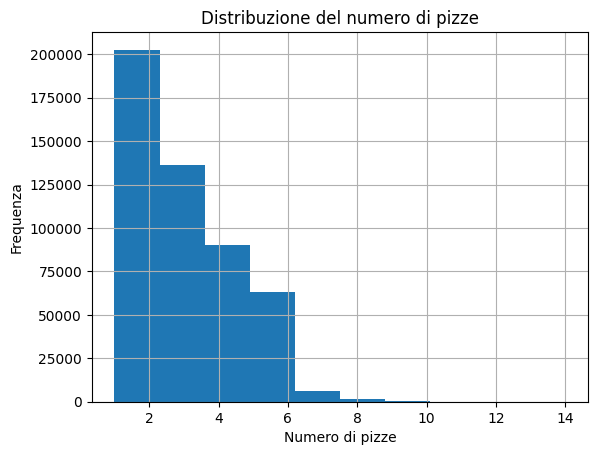

In [11]:
plt.figure()
df["num_pizzas"].hist()
plt.title("Distribuzione del numero di pizze")
plt.xlabel("Numero di pizze")
plt.ylabel("Frequenza")
plt.show()

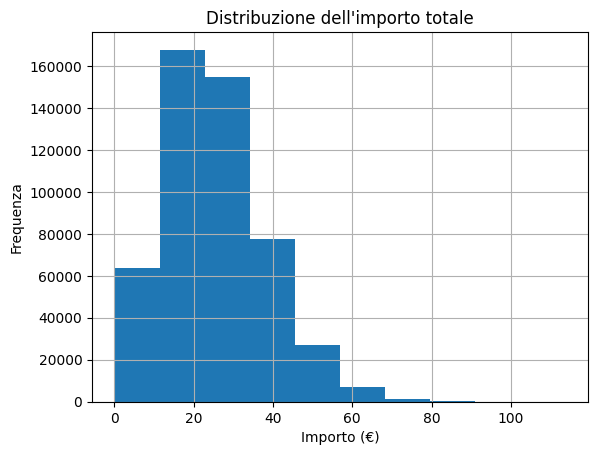

In [12]:
plt.figure()
df['total_amount'].hist()
plt.title("Distribuzione dell'importo totale")
plt.xlabel("Importo (€)")
plt.ylabel("Frequenza")
plt.show()

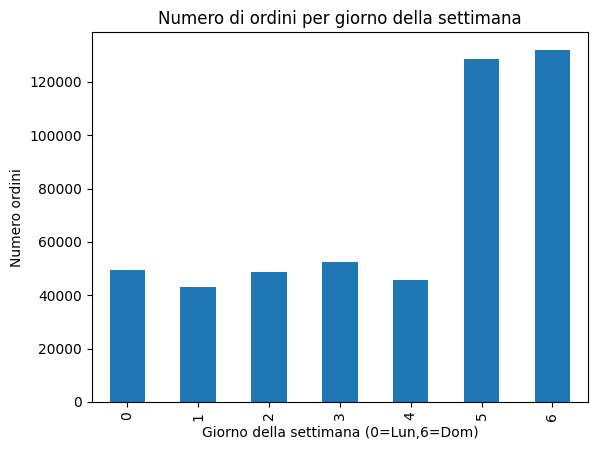

In [13]:
# ANALISI CATEGORICA: ordini per giorno della settimana
dow_counts = df['day_of_week'].value_counts().sort_index()
plt.figure()
dow_counts.plot(kind='bar')
plt.title("Numero di ordini per giorno della settimana")
plt.xlabel("Giorno della settimana (0=Lun,6=Dom)")
plt.ylabel("Numero ordini")
plt.show()

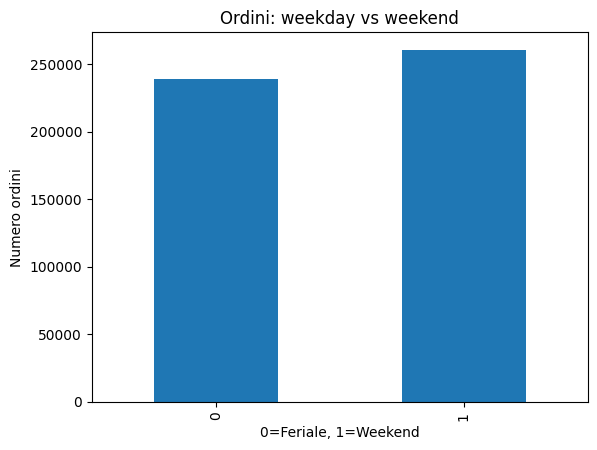

In [ ]:
weekend_counts = df['is_weekend'].value_counts().sort_index()
plt.figure()
weekend_counts.plot(kind='bar')
plt.title("Ordini: weekday vs weekend")
plt.xlabel("0=Feriale, 1=Weekend")
plt.ylabel("Numero ordini")
plt.show()

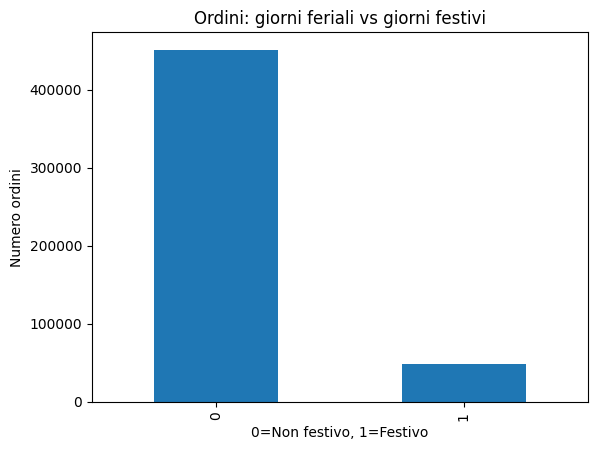

In [15]:
# Analisi festività vs non festività
holiday_counts = df['is_holiday'].value_counts().sort_index()
plt.figure()
holiday_counts.plot(kind='bar')
plt.title("Ordini: giorni feriali vs giorni festivi")
plt.xlabel("0=Non festivo, 1=Festivo")
plt.ylabel("Numero ordini")
plt.show()

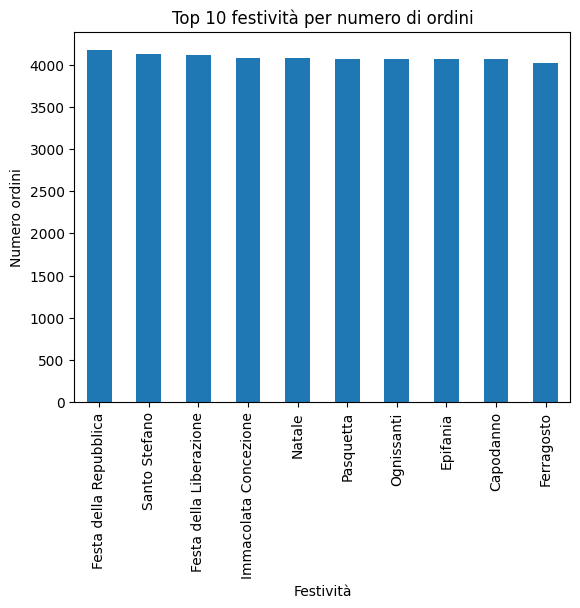

In [16]:
# Top 10 festività per numero di ordini
top_holidays = df[df['is_holiday'] == 1]['holiday_name'].value_counts().head(10)
plt.figure()
top_holidays.plot(kind='bar')
plt.title("Top 10 festività per numero di ordini")
plt.xlabel("Festività")
plt.ylabel("Numero ordini")
plt.show()

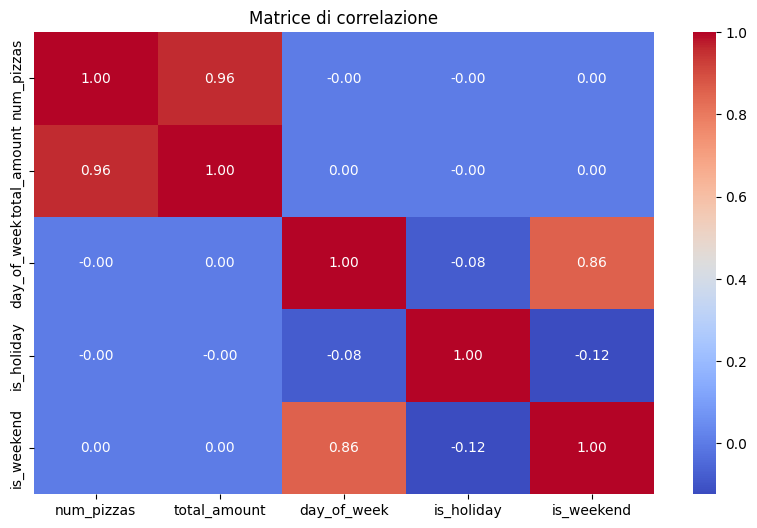

In [19]:
# matrice di correlazione
corr = df[['num_pizzas', 'total_amount', 'day_of_week', 'is_holiday', 'is_weekend']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di correlazione")
plt.show()

In [28]:
# converto colonna 'order_date' in datetime
df['order_datetime'] = pd.to_datetime(df['order_datetime'], format='%Y-%m-%d %H:%M:%S')

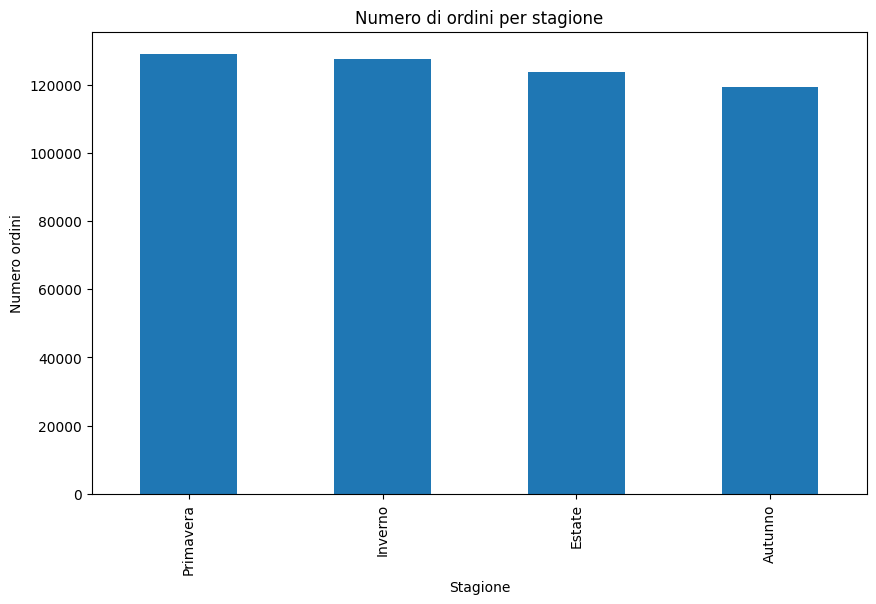

In [29]:
def get_season(month: int) -> str:
    if month in [12, 1, 2]:
        return 'Inverno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Estate'
    else:
        return 'Autunno'

df["mese"] = df["order_datetime"].dt.month
df["season"] = df["mese"].apply(get_season)

df = df.drop(columns=["mese"])
season_counts = df['season'].value_counts()
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar')
plt.title("Numero di ordini per stagione")
plt.xlabel("Stagione")
plt.ylabel("Numero ordini")
plt.show()

In [32]:
df.head()

,order_id,order_datetime,day_of_week,is_weekend,is_holiday,holiday_name,num_pizzas,total_amount,distance_km,temperature_C,season,hour
0,132708,2024-01-01 11:00:06,0,0,1,Capodanno,2,19.25,5.50,18.3,Inverno,11
1,487813,2024-01-01 11:00:18,0,0,1,Capodanno,3,33.58,6.64,13.6,Inverno,11
2,471520,2024-01-01 11:00:40,0,0,1,Capodanno,4,32.86,3.33,13.3,Inverno,11
3,182076,2024-01-01 11:01:22,0,0,1,Capodanno,3,22.95,0.48,16.0,Inverno,11
4,422617,2024-01-01 11:01:36,0,0,1,Capodanno,4,38.66,1.45,13.7,Inverno,11


(array([49965.,     0., 49969.,     0., 49506.,     0.,     0., 12532.,
            0., 12260.,     0.,     0., 12564.,     0., 12444.,     0.,
        75261.,     0.,     0., 75247.,     0., 75030.,     0., 75222.]),
 array([11.        , 11.41666667, 11.83333333, 12.25      , 12.66666667,
        13.08333333, 13.5       , 13.91666667, 14.33333333, 14.75      ,
        15.16666667, 15.58333333, 16.        , 16.41666667, 16.83333333,
        17.25      , 17.66666667, 18.08333333, 18.5       , 18.91666667,
        19.33333333, 19.75      , 20.16666667, 20.58333333, 21.        ]),
 <BarContainer object of 24 artists>)

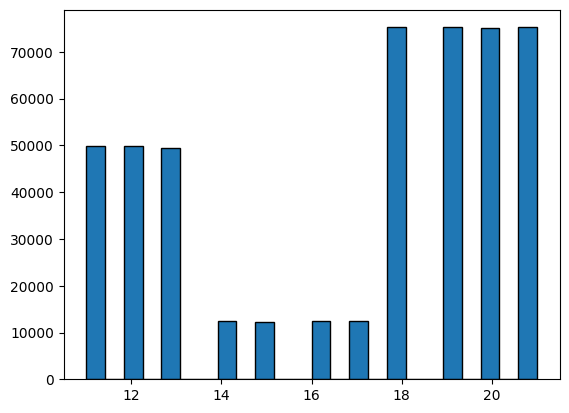

In [33]:
plt.hist(df["hour"], bins=24, edgecolor='black')

In [37]:
# salviamo il dataframe aggiornato
df.to_csv(r"C:\Users\fabri\Desktop\my_repo\env\orders.csv", index=False)